## Linear Regression 
#### Univariant Linear Regression, from scratch.

#### AI Saturday Lagos Begineers Class (Instructors: Tejumade Afonja, Kenechi Dukor, Ifeanyi Igwegbe George)
This exercise is adopted from [Andrew Ng Machine Learning Course](https://www.coursera.org/learn/machine-learning)

NOTE: You will notice slight modification on the codes which makes it a bit different from what we practiced in class. Please do not get confused.

The whole concept remains the same, i only made the codes shorter.

In [1]:
# Libraries required for this practice 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Data

The data we will be using is a .txt file which contains a list of population for different cities and their corresponding profit.

The values on the first column contains the population of the cities and the values of the second column contains the corresponding profits, in 10,000's, seperated by a comma..

The goal of this exercise is to use linear regression and the optimization technique to generate a model that will precitreasonable estimate of a city's profit when it is supplied the city's population.

In [2]:
# Using pandas to view the data
data = pd.read_csv("ex1data1.txt", sep=',', header = None)
data.columns=["Population of city in 10,000","Profit in $10,000"]

In [3]:
# this will show the first five data in the dataframe
data.head()

,"Population of city in 10,000","Profit in $10,000"
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
# Lets convert values of the pandas dataframe into a numpy array
data = data.values

You can also convert the data in to a numpy array without needing to go through pandas. Use the code below

`data = np.loadtxt("ex1data1.txt", delimiter=',')`

In [5]:
print(data.shape) 

(97, 2)


We have 97 training examples and one independent variable `x` on the first column and one dependent variable `y` on the second column

**Recall:**
- Our untrained model is given by: ![title](img/model.gif)
    
- Which you can also be written as ![title](img/model2.gif)

where:
- `y` is the ground truth or output
- `x` is the input values
- `theta` is the weight or parameters that needs to learn


Beacuse the coefficient of `theta` is `x` and `1`, we want to create a `97 x 2` matrix that contains the input values on the first column and ones in the second column

In [6]:
x = np.c_[data[:,0], np.ones(data.shape[0])] 

Similarly, we want to create a row vector with a dimension of `97 x 1` for all the output values in our dataset

In [7]:
y = np.c_[data[:,1]]

### Data Visualization

Text(0.5, 1.0, 'Graph of Profit in $10,000 against Population in 10,000')

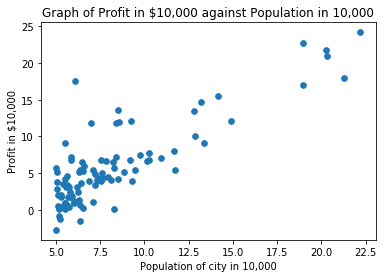

In [8]:
# Lets plot the data to see how they correlate.
plt.scatter(x[:,0], y, s=32, marker='o')
plt.xlabel("Population of city in 10,000")
plt.ylabel("Profit in $10,000")
plt.title("Graph of Profit in $10,000 against Population in 10,000")

Notice that there is a positive correlation between the two data. This means that we can develop a model that will be able to make reasonable predictions

### Training 

Recall from the class, the process to training a linear regression model is as follow.

We want to find the appropriate value of `theta` that will give us a good estimate of a city's profit if lthe city's population is supplied.

To do this, 
- We want to start with a random value of `theta` to generate a hypothesis
![title](img/model3.gif)

- Then continually correct values of `theta` until the deviation of the hypothesis/prediction `h` from the ground-truth `y` is greatly reduced

**Note:** 
- Matrix multiplication was utilized for the calculation?. 

In [9]:
def train(x, y):
    iteration = 2500
    # For this practice are initiallizing are theta with values of zero.
    theta = [[0],[0]]
    # Here, want to save our cost function or loss or square error, 
    # so that we can have an idea of how the deviation of the hypothesis from the ground thruth reduces
    cost_function = np.zeros(iteration)
    
    for i in range(iteration):
        # Step 1: we make a prediction using the random weights (theta) that we initialized
        # @ is a fancy way do performing dot products
        h = x @ theta
        # Step 2: We take a step to correct the weights (theta) to that the next predicion will be better
        theta = update_weight(h, theta, x)
        # Step 3: We measure the deviation or error
        cost_function[i] = cost(x, theta)

        print("The cost function is ", cost_function[i])
        
    return theta, cost_function

But how do we check the error like we defined above?

Remember the error formular (cost function)? 
![title](img/model44.gif)

where:
- `m` is the number of training example
- `x` is the input data
- `h` is the hypothesis
- `y` is the prediction

The equation tries to find the square error between the ground truth and the prediction.


In [10]:
def cost(x, theta):
    m = x[:,0].size
    h = x @ theta
    return (1/2*m) * np.sum(np.square(h - y))

Now that we are able to get a sense of the error, how do we update how weight (theta) such that is predicts better?

Like we discussed in class, gradient descent algorithim will be used for this purpose.

The general formular for gradient is given below:
![title](img/model6.gif)
which can be differentiated to give:
![title](img/model5.gif)
where
- alpha is the learning rate

ie: we continually update the weight(theta) by taking steps(alpha) for the derived gradient of the error until we have sufficiently minimized theta.

In [11]:
def update_weight(h, theta, x):
    m = x[:,0].size
    alpha = 0.01
    theta = theta - alpha * (1/m * (x.T @ (h - y)))
    return theta


Now, lets pass in our data and train.

In [12]:
theta, cost_values = train(x, y)

The cost function is  63390.22508396189
The cost function is  55810.36388700404
The cost function is  55523.96463892878
The cost function is  55468.205769853674
The cost function is  55419.90331979097
The cost function is  55372.00412679627
The cost function is  55324.28470894376
The cost function is  55276.73740262106
The cost function is  55229.36136618629
The cost function is  55182.15597572936
The cost function is  55135.120616371896
The cost function is  55088.25467566468
The cost function is  55041.55754337132
The cost function is  54995.02861145362
The cost function is  54948.667274063555
The cost function is  54902.472927535295
The cost function is  54856.4449703774
The cost function is  54810.582803264966
The cost function is  54764.8858290318
The cost function is  54719.353452662675
The cost function is  54673.98508128563
The cost function is  54628.780124164085
The cost function is  54583.73799268937
The cost function is  54538.85810037289
The cost function is  54494.1398628

The cost function is  42549.112058699975
The cost function is  42547.580194490474
The cost function is  42546.05384796746
The cost function is  42544.532999256524
The cost function is  42543.01762855489
The cost function is  42541.507716131055
The cost function is  42540.00324232466
The cost function is  42538.504187546074
The cost function is  42537.010532276305
The cost function is  42535.52225706663
The cost function is  42534.03934253836
The cost function is  42532.561769382635
The cost function is  42531.089518360146
The cost function is  42529.62257030089
The cost function is  42528.16090610388
The cost function is  42526.70450673696
The cost function is  42525.25335323652
The cost function is  42523.80742670724
The cost function is  42522.36670832187
The cost function is  42520.931179320985
The cost function is  42519.500821012705
The cost function is  42518.075614772526
The cost function is  42516.65554204296
The cost function is  42515.24058433343
The cost function is  42513.8

The cost function is  42152.32761450652
The cost function is  42152.22494496694
The cost function is  42152.12264523711
The cost function is  42152.02071398501
The cost function is  42151.919149883404
The cost function is  42151.817951609824
The cost function is  42151.71711784658
The cost function is  42151.61664728073
The cost function is  42151.516538604075
The cost function is  42151.41679051308
The cost function is  42151.31740170898
The cost function is  42151.21837089758
The cost function is  42151.119696789465
The cost function is  42151.0213780998
The cost function is  42150.923413548364
The cost function is  42150.8258018596
The cost function is  42150.7285417625
The cost function is  42150.63163199068
The cost function is  42150.53507128224
The cost function is  42150.4388583799
The cost function is  42150.34299203088
The cost function is  42150.247470986935
The cost function is  42150.15229400426
The cost function is  42150.0574598436
The cost function is  42149.96296727010

In [13]:
cost_values

array([63390.22508396, 55810.363887  , 55523.96463893, ...,
       42125.47136073, 42125.46542587, 42125.45951238])

In [14]:
# Now, lets see our trained weights
print('Our learned value of theta: ',theta.ravel())

Our learned value of theta:  [ 1.18864349 -3.85208068]


Lets visualize how or error reduced during the iteration. This is the power of gradient descent. 

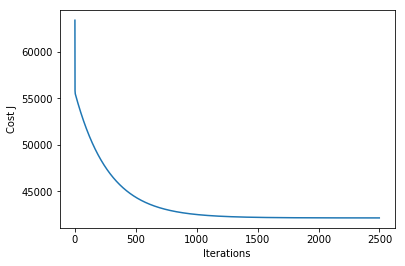

In [15]:
plt.plot(cost_values)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

Notice that at the `1500th iteration`, the model doesnt really change anymore. You should actually stop the iteration at that time and save cost of processing

Lets see our regression line.
Note: YOU DON'T NEED TO COUNT THE NUMBER OF DATA POINT THAT YOUR LINE SEPERATES; lol!

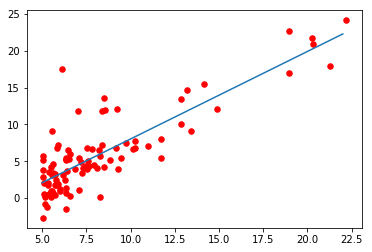

In [16]:
x_plot = np.arange(5,23)
y_plot = theta[0]*x_plot + theta[1]
# Plot gradient descent
plt.scatter(x[:,0], y, s=30, c='r', marker='o', linewidths=1)
plt.plot(x_plot,y_plot, label='Linear regression (Gradient descent)')

### Prediction

Here, I hard coded the learned weights in the model that we defined earlier.
![Title](img/model.gif)

In [17]:
def predict():
    input_ = float(input("Input the population size/10000: "))
    print("For a population of ", input_, ", the profit is $", ((input_ * 1.18864349) - 3.85208068) * 10000)

In [18]:
predict()

Input the population size/10000: 100
For a population of  100.0 , the profit is $ 1150122.6832


We could even find our input based if we have the output, although it is not realistic in this case

In [19]:
def predict_inverse():
    input_ = float(input("Input the Profit size: "))
    print("For a profit of ", input_, " the population is ", (((input_ / 10000) + 3.85208068) / 1.18864349)*10000 )

In [20]:
predict_inverse()

Input the Profit size: 2000
For a profit of  2000.0  the population is  34089.9581252912


### Assignment:

1. Use `scikit-learn` to develop a linear regression model using the same dataset in this practice and compare result.
2. Explore the internet for an univariant dataset and use this algorithim to train a linear regression model. Use `scikit-learn` too

Assignment is due for submission on `29/03/2019`.

Summission link will be posted on the `WhatsApp Class Group`